## Introduction

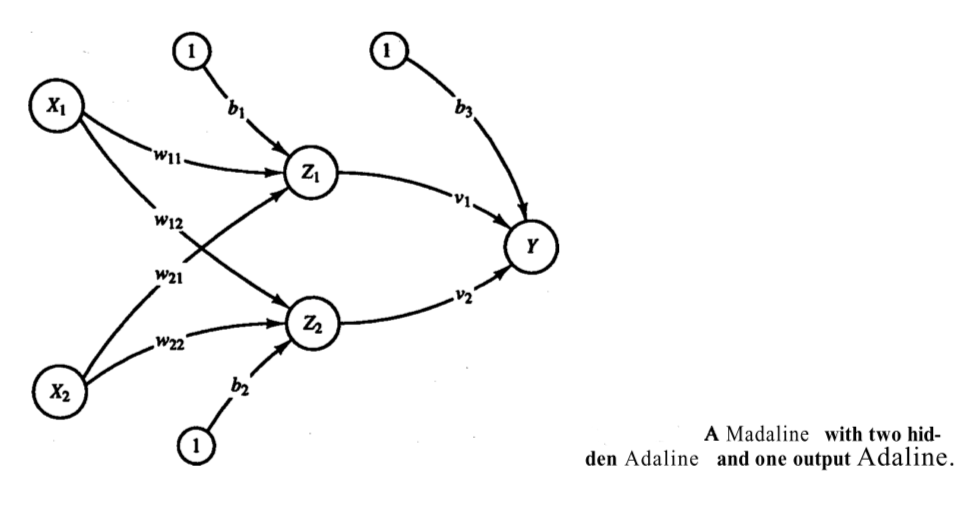

For updating the weights in the Madeline, there are two algorithms that are commonly used: 

1. MR-I algorithm (the original form of MADALINE training): only the weights for the hidden Adalines are adjusted; the weights for the output unit are fixed.
2. MR-II algorithm: both the weights for the hidden Adalines and the weights for the output unit are adjusted.

We will try to use this model to classify the `make_gaussian_quantiles` dataset from sklearn. For training the model, we will use both the MR-I and MR-II algorithms. At first we try this model with 3 neurons in the hidden layer, and then we try with 5 and then 8 neurons in the hidden layer.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine, make_gaussian_quantiles
from tabulate import tabulate
from tqdm.notebook import tqdm
from IPython.display import display, HTML

In [120]:
class Madeline:
    def __init__(self, n_neurons, learning_rate=0.01, n_iters=1000):
        self.n_neurons = n_neurons
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        
        self.output_layer_weights = np.zeros(n_neurons) + 1
        self.output_layer_bias = n_neurons - 1
    
    def compile(self):
        pass
    
    def fit(self, X, Y):
        self.weights = np.zeros(shape = (self.n_neurons, X.shape[1])) + 0.01
        self.bias = np.zeros(self.n_neurons) + 0.01
        self.cost_per_epoch = []

        for _ in tqdm(range(self.n_iters)):
            cost = 0
            for x, label in zip(X, Y):
                z_in = np.sum(x * self.weights, axis = 1) + self.bias
                z = self._activation(z_in)

                y_in = np.dot(z, self.output_layer_weights) + self.output_layer_bias
                y = self._activation(y_in)

                cost += ((label - y) ** 2) / 2.0
                
                if(label == 1 and y == -1):
                    to_update = z_in.argmax()
                    self.weights[to_update, :] += self.learning_rate * (1 - z_in[to_update]) * x
                    self.bias[to_update] += self.learning_rate * (1 - z_in[to_update])

                elif(label == -1 and y == 1):
                    to_update = (z_in > 0)
                    n = to_update.sum()

                    x1 = np.reshape(-1 - z_in[to_update], (n, 1))
                    x2 = np.tile(x, (n, 1))

                    self.weights[to_update, :] += self.learning_rate * (x1 * x2)
                    self.bias[to_update] += self.learning_rate * (-1 - z_in[to_update])
                    

            self.cost_per_epoch.append(cost)
        return self

    
    def predict(self, X):
        predicted = []
        for x in X:
            z_in = np.sum(x * self.weights, axis = 1) + self.bias
            z = self._activation(z_in)
            y_in = np.dot(z, self.output_layer_weights) + self.output_layer_bias
            y = self._activation(y_in)
            predicted.append(y)

        return np.array(predicted)
    
    def _activation(self, x):
        return np.where(x >= 0.0, 1, -1)
    
class Madeline_MRI(Madeline):
    pass
class Madeline_MRII(Madeline):
    pass

def plot_decision_regions_madaline(x, y, classifier, resolution=0.02):
    plt.figure(figsize=(10, 7))
    for i in range(classifier.n_neurons):
            plt.axline(
                (0, float(-classifier.bias[i] / classifier.weights[i][1])), 
                slope=-classifier.weights[i][0] / classifier.weights[i][1], 
                color = "purple"
            )
            
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = matplotlib.colors.ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=x[y == cl, 0],
            y=x[y == cl, 1],
            alpha=0.8,
            c=[cmap(idx)],
            marker=markers[idx],
            label=cl,
        )
        
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="upper left")
    plt.show()

Now we will plot the decision boundary for the model with 3 neurons in the hidden layer, and then we will plot the decision boundary for the model with 5 neurons in the hidden layer, and then we will plot the decision boundary for the model with 8 neurons in the hidden layer. We will use `make_gaussian_quantiles` dataset from sklearn for this purpose.

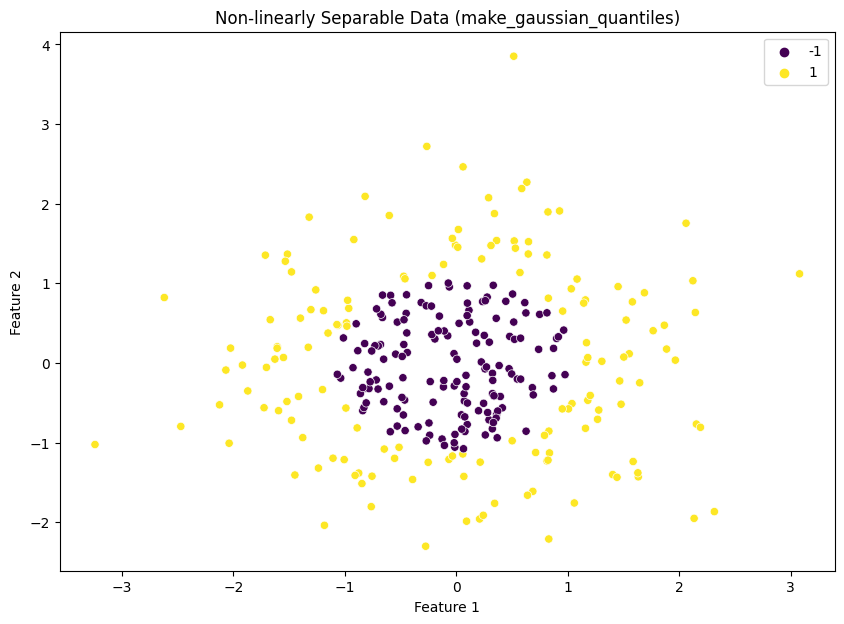

In [121]:
x, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300, random_state=42)
y = np.where(y == 1, 1, -1)

plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x = x[:, 0],
    y = x[:, 1],
    hue=y,
    palette="viridis",
)
plt.title("Non-linearly Separable Data (make_gaussian_quantiles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Madaline Model using 3 hidden neurons:


  0%|          | 0/1000 [00:00<?, ?it/s]

+---------+--------------------+
| Dataset |      Accuracy      |
+---------+--------------------+
|  Train  |       0.8625       |
|  Test   | 0.7833333333333333 |
+---------+--------------------+


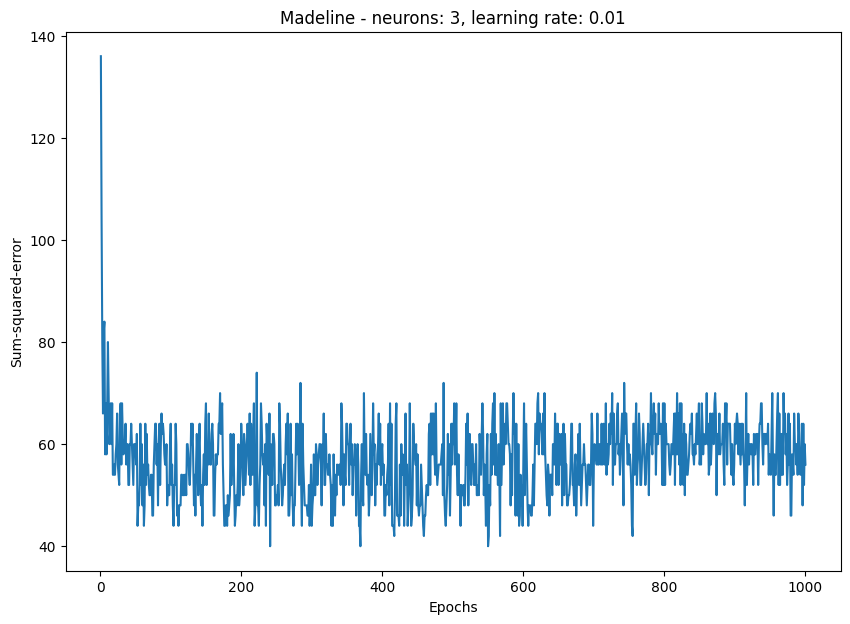

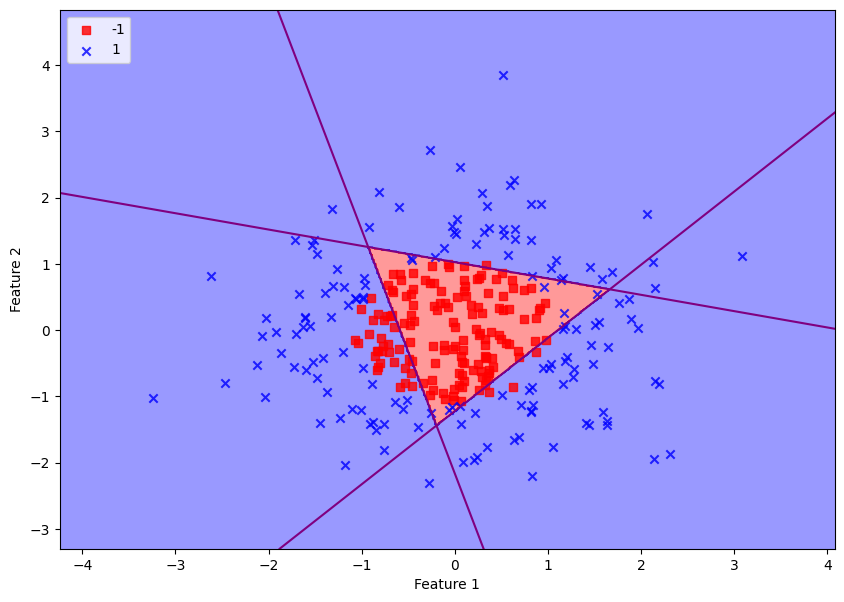

Madaline Model using 5 hidden neurons:


  0%|          | 0/1000 [00:00<?, ?it/s]

+---------+--------------------+
| Dataset |      Accuracy      |
+---------+--------------------+
|  Train  | 0.9791666666666666 |
|  Test   | 0.9166666666666666 |
+---------+--------------------+


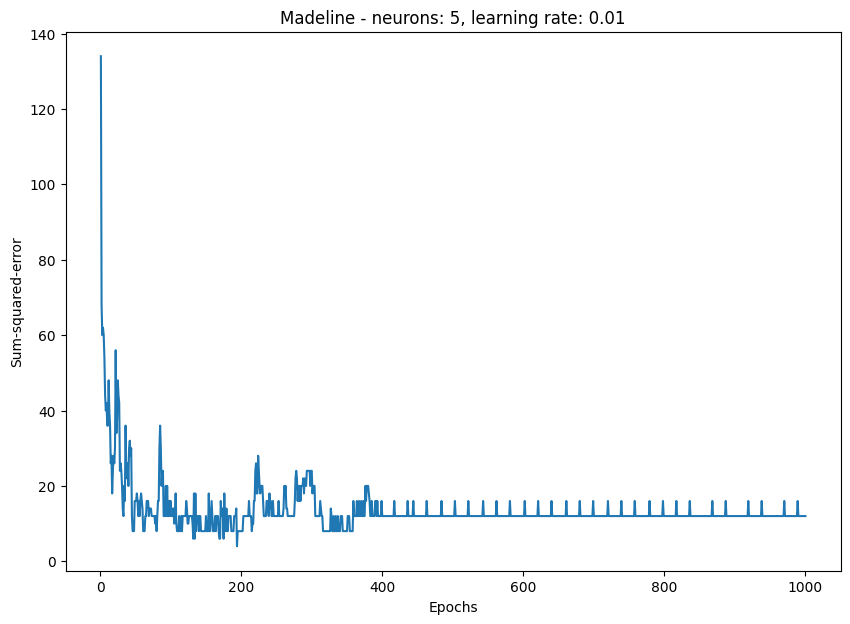

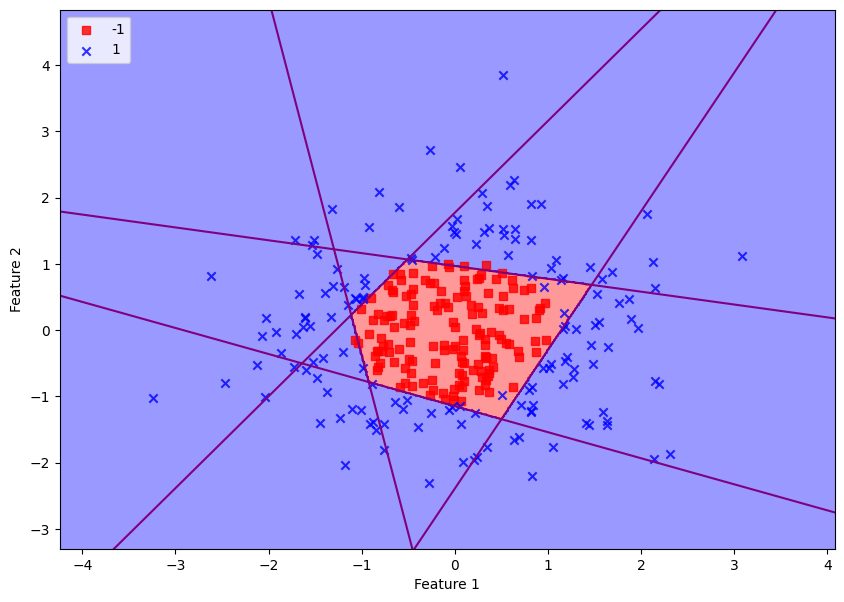

Madaline Model using 8 hidden neurons:


  0%|          | 0/1000 [00:00<?, ?it/s]

+---------+----------+
| Dataset | Accuracy |
+---------+----------+
|  Train  |   1.0    |
|  Test   |   0.95   |
+---------+----------+


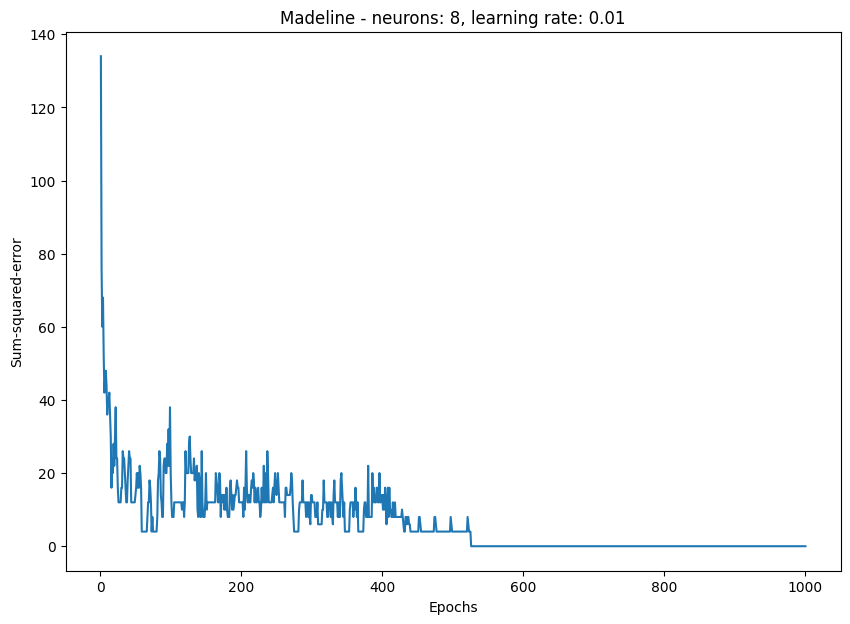

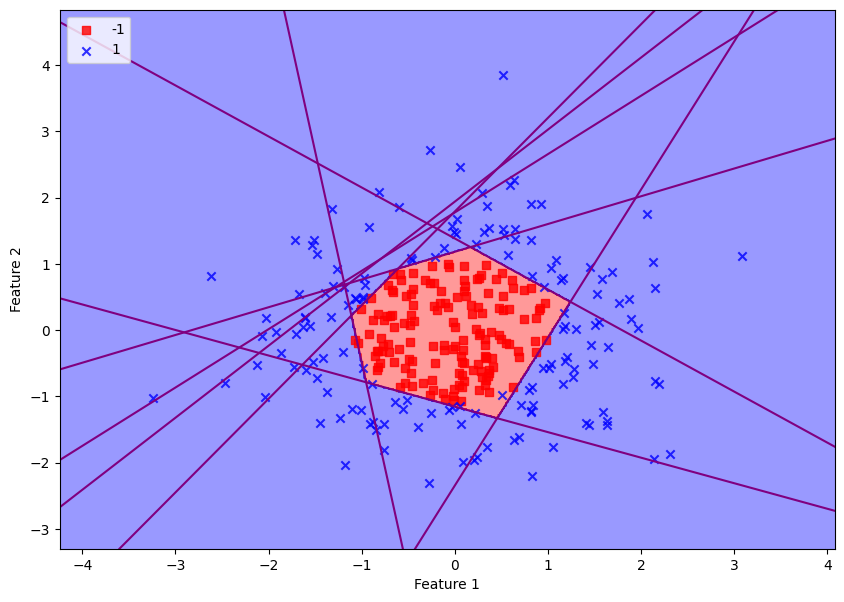

In [123]:
n_neurons = [3, 5, 8]

for n in n_neurons:
    print(f"Madaline Model using {n} hidden neurons:")
    model = Madeline(n, 0.01, 1000)

    model.compile()
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    evluate(y_train, y_test, y_train_pred, y_test_pred)
    plot_errors(model.cost_per_epoch, f"Madeline - neurons: {n}, learning rate: {0.01}")
    plot_decision_regions_madaline(x, y, model)

As expected, the decision boundary is more accurate when we use more neurons in the hidden layer. This is because the model can learn more complex patterns in the data when we use more neurons in the hidden layer. In model with 3 neurons in the hidden layer, the decision boundary is not very accurate, and the model is not able to classify the data very well. In model with 5 neurons in the hidden layer, the decision boundary is more accurate, and the model is able to classify the data better. In model with 8 neurons in the hidden layer, the decision boundary is even more accurate, and the model is able to classify the data even better.